# Harshil Patel DAI project2 911 Calls (16Qs)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\harshil\Desktop\DAI\Project2\911.csv")

In [6]:
print(data)
#lat: String variable, Latitude
#lng: String variable, Longitude
#desc: String variable, Description of the Emergency Call
#zip: String variable, Zipcode
#title: String variable, Title
#timeStamp: String variable, YYYY MM DD HH:MM:SS
#twp: String variable, Township
#addr: String variable, Address
#e: String variable, Dummy variable (always 1)

             lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...  19003.0   
99489 

In [7]:
#Q1 : Top 5 zipcodes for 911 calls
#df = pd.DataFrame(data, columns=['lat','lng','desc','zip','title','timeStamp','twp','addr','e'])
#df.sort_values(by=['zip'],ascending=False).head(5)
data.head()
pd.value_counts(data['zip'],ascending=False).head()
#can use groupby as well

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [15]:
#Q2 : Custom function Reason using .apply()
data['Reason'] = data['title'].apply(lambda x : x.split(':')[1])
data.insert(5,'Department','')
data['Department'] = data['title'].apply(lambda x : x.split(':')[0])
data.head()
#lambda fucntion takes any no. of args but returns only one expression
#Here, split is made after ':' to get the reason for 911 call -> thus Reason column is added at the end & separated from title

,lat,lng,desc,zip,title,Department,timeStamp,twp,Hour,Month,Day of Week,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,NEW HANOVER,17,12,Thu,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,HATFIELD TOWNSHIP,17,12,Thu,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,NORRISTOWN,17,12,Thu,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,NORRISTOWN,17,12,Thu,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,LOWER POTTSGROVE,17,12,Thu,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [10]:
#Q3 : Most common Reason for a 911 call based on new column after Q2
pd.value_counts(data['Reason'],ascending=False)
#Thus, 'Vehicle Accident' is the most common reason for 911 call

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
                          ...  
 ACTIVE SHOOTER               2
 SUSPICIOUS                   2
 WARRANT SERVICE              2
 DISABLED VEHICLE             1
 BOMB DEVICE FOUND            1
Name: Reason, Length: 81, dtype: int64

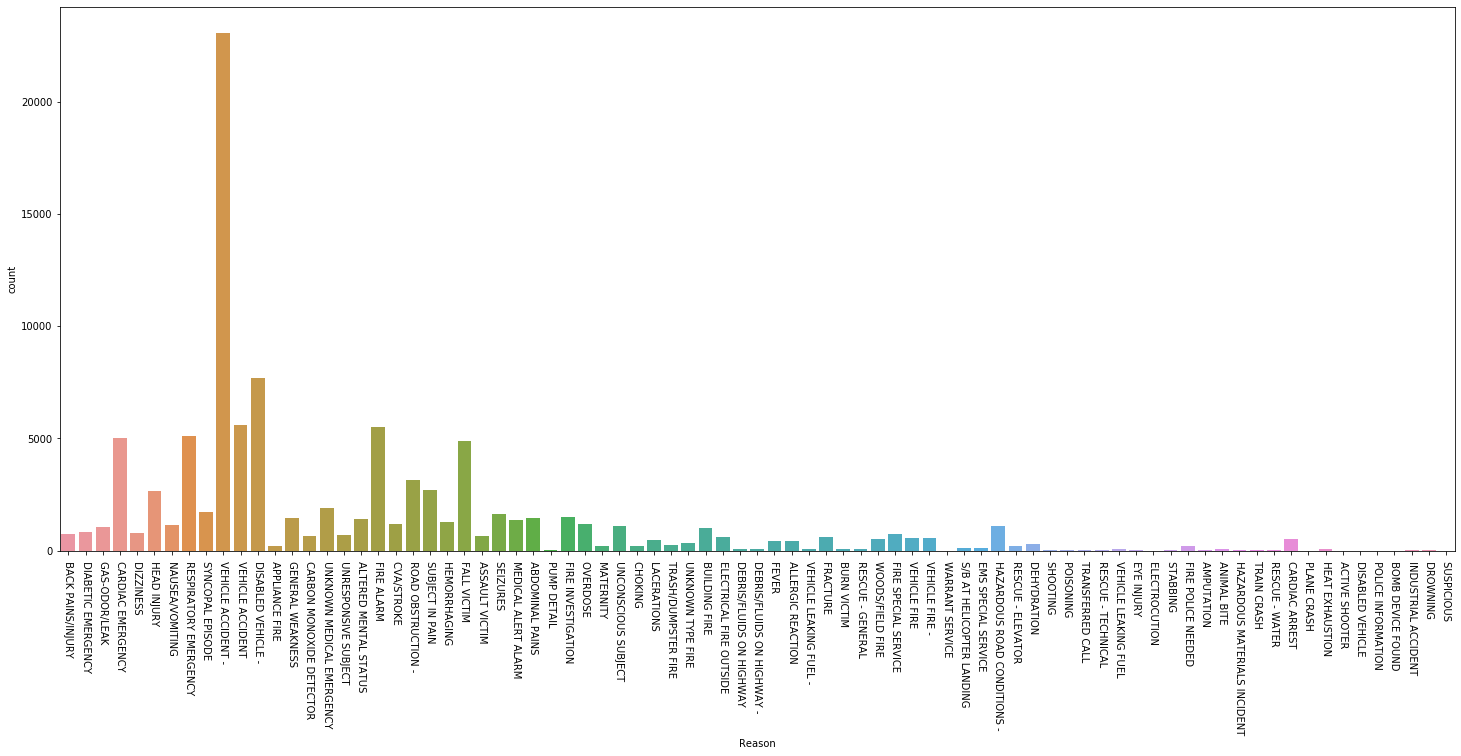

In [12]:
#Q4 : Countplot of 911 calls by Reason
fig , ax0 = plt.subplots(figsize=(25,10))
ax1 = sb.countplot(data['Reason'],ax=ax0)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=270);
#Seaborn has already been imported in 1st command as sb
#Countplot shows that vehicle accidents are close to 25,000 and next highest reason is disabled vehicle close to 7,500

In [14]:
#Q5 : Data type of the objects in the timeStamp column -> String
#data['timeStamp'].dtypes
type(data['timeStamp'][0]) 

str

In [5]:
#Q6 : Converting timestamp datatype string to DateTime objects -> we use to_datetime function with help of pandas
data['timeStamp']= pd.to_datetime(data['timeStamp'])
type(data['timeStamp'][0])
data['timeStamp']
#data.info() can also be used 

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [6]:
#Q7 : Creating new columns Hour, Month & Day of Week based on timestamp column
#Previous cell's output shows us the date and time as output which has been created into columns based on timestamp
time = data['timeStamp'].iloc[0] 
time.month, time.hour, time.weekday()
#now we apply methods of hour,month and weekday as columns 7,8 and 9
data.insert(7,'Hour','')
data['Hour'] = data['timeStamp'].apply(lambda x : x.hour)

data.insert(8,'Month','')
data['Month']=data['timeStamp'].apply(lambda x : x.month)

data.insert(9,'Day of Week','')
data['Day of Week']=data['timeStamp'].apply(lambda x : x.weekday())
#New columns have been added based on timestamp column and can be seen right of it in the table
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,Hour,Month,Day of Week,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,17,12,3,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,17,12,3,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,17,12,3,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,17,12,3,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,17,12,3,CHERRYWOOD CT & DEAD END,1


In [7]:
#Q8 : Mapping actual string names to day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)
data.head()
#Thus, we can see in the output for Day of Week column that previous output's value of 3 has changed to Thu

,lat,lng,desc,zip,title,timeStamp,twp,Hour,Month,Day of Week,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,17,12,Thu,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,17,12,Thu,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,17,12,Thu,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,17,12,Thu,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,17,12,Thu,CHERRYWOOD CT & DEAD END,1


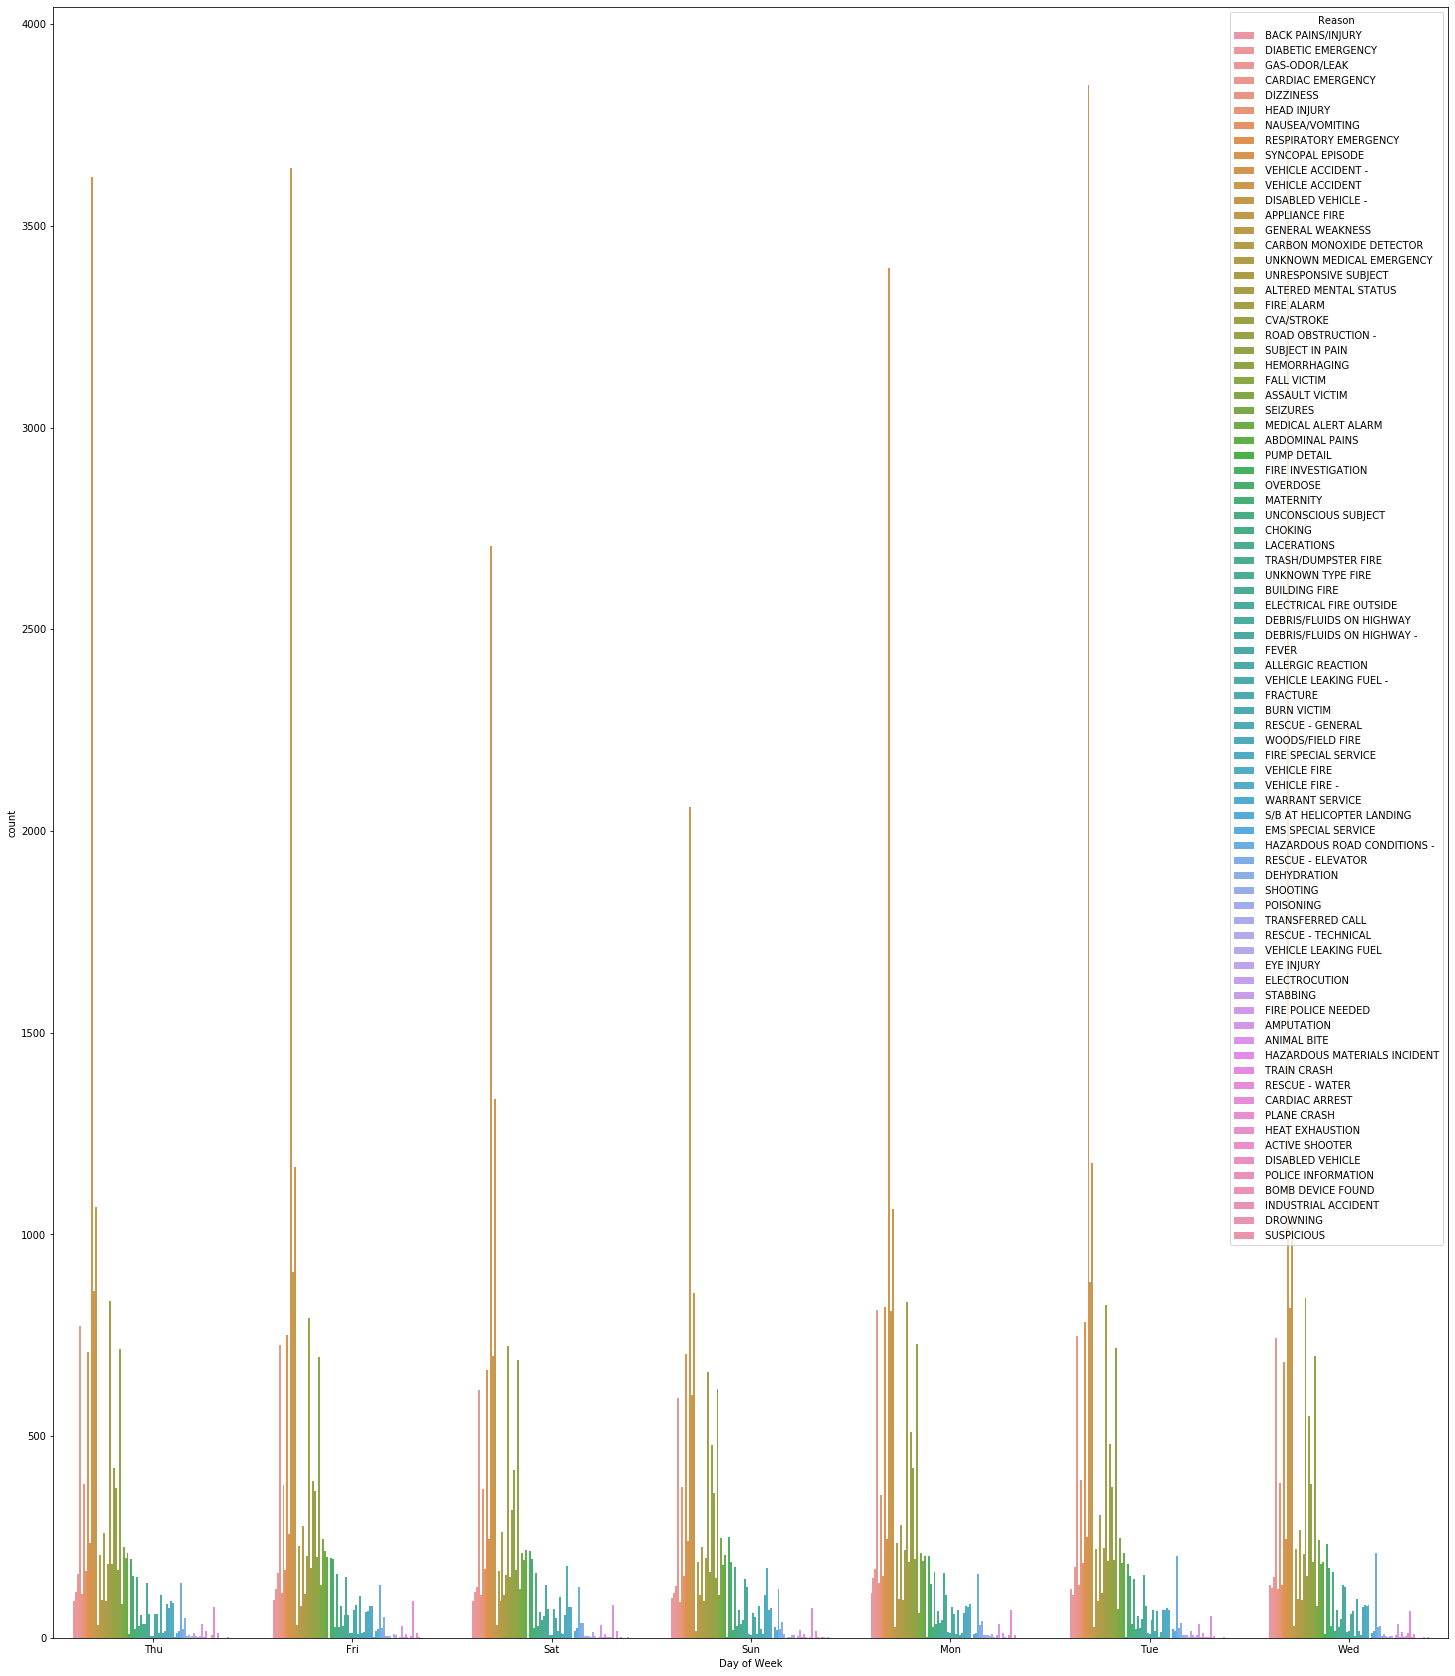

In [17]:
#Q9 : Creating a countplot of the Day of Week column with the hue based on the Reason column
fig, ax = plt.subplots(figsize=(25, 30))
ax = sb.countplot(data['Day of Week'], hue=data['Reason']);
#Seaborn has already been imported in first command
#Hue is the parameter for countplot giving us the output of Reason's accoring to Days of the Week

In [35]:
#Q10 : Creating a gropuby object called byMonth & grouping dataframe by month column
data.fillna(value='None')
data.isna().sum();

value = data.groupby('Month').count()
value

,lat,lng,desc,zip,title,Department,timeStamp,twp,Hour,Date,Day of Week,addr,e,Reason
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13203,13205,13205,13205,13096,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11465,11467,11467,11467,11396,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11092,11101,11101,11101,11059,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11323,11326,11326,11326,11283,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11420,11423,11423,11423,11378,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11777,11786,11786,11786,11732,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12133,12137,12137,12137,12088,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9073,9078,9078,9078,9025,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7963,7969,7969,7969,7916,7969,7969


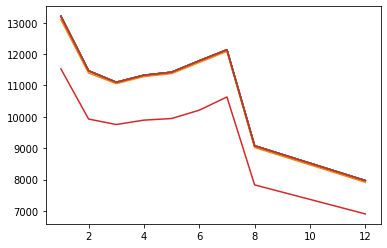

In [37]:
#Q11 : Plotting data frame of count of calls/month
value = data.groupby('Month').count()
value
plt.plot(value);
#Thus, we get a month wise distribution of 911 calls made per month
#On analysis, January has the most and December has the least number of calls

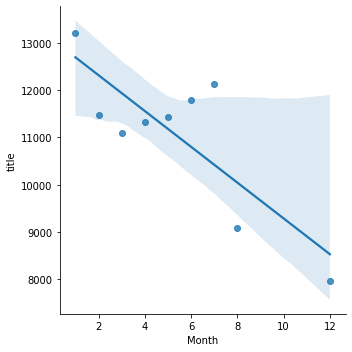

In [33]:
#Q12 : Creating a linear fit on the number of calls per month using Implot()
month_wise = data.groupby('Month').count()
month_wise.head()
#The lmplot plot shows the line along with datapoints on the 2D space
sb.lmplot(x='Month',y='title',data=month_wise.reset_index())
#Index after grouping data by Month is reset using reset_index()

In [20]:
#Q13 : Creating new column Date that contains date from timestamp cloumn
data.insert(10,'Date','')
data['Date']=data['timeStamp'].apply(lambda x : x.date())
data.head()
#Thus, we can see in the output table that 'Date' column has been added as column 10 based on timestamp

,lat,lng,desc,zip,title,Department,timeStamp,twp,Hour,Month,Date,Day of Week,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,EMS,2015-12-10 17:40:00,NEW HANOVER,17,12,2015-12-10,Thu,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,EMS,2015-12-10 17:40:00,HATFIELD TOWNSHIP,17,12,2015-12-10,Thu,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,Fire,2015-12-10 17:40:00,NORRISTOWN,17,12,2015-12-10,Thu,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,EMS,2015-12-10 17:40:01,NORRISTOWN,17,12,2015-12-10,Thu,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,EMS,2015-12-10 17:40:01,LOWER POTTSGROVE,17,12,2015-12-10,Thu,CHERRYWOOD CT & DEAD END,1,DIZZINESS


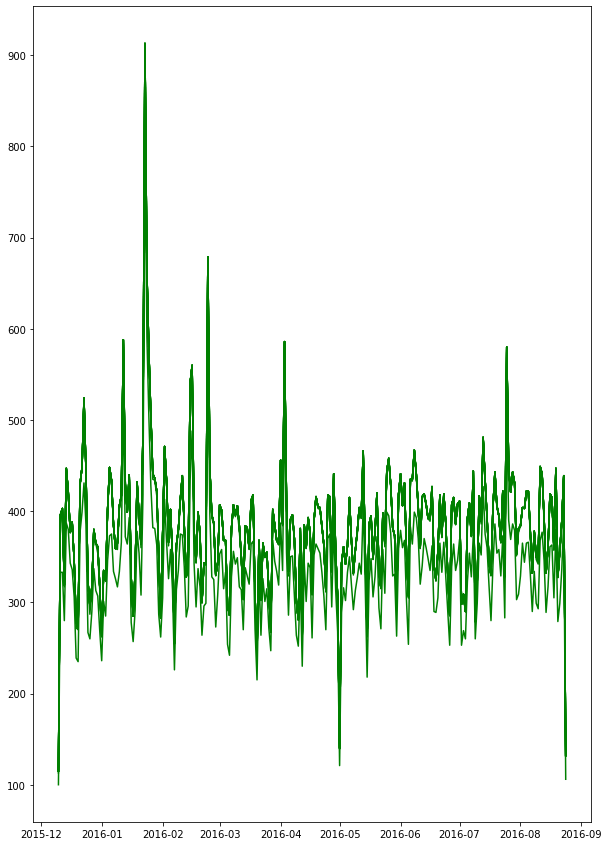

In [25]:
#Q14 : Plotting count of 911 calls after using groupby on Date column in Q13
newvalue = data.groupby('Date').count()

fig, axis = plt.subplots(figsize=(10, 15))
ax = plt.plot(newvalue, color='green')
#As we can see in the bottom y-axis of plot, we get a date wise plot of 911 calls with count as x-axis

In [39]:
#Q15 : Plotting 3 separate plots representing Reason for 911 call


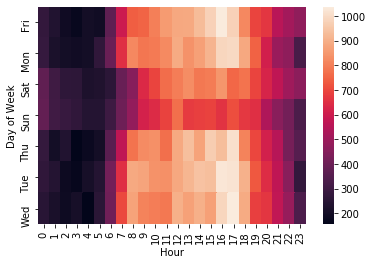

In [22]:
#Q16 : Creating heatmaps after restructing dataframe(Columns-Hours,Index-DaysoftheWeek)
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
sb.heatmap(dayHour)